In [0]:
!pip install -U -q PyDrive #will have to install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 

#authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 16.2MB/s 


In [0]:
#get the file
white = drive.CreateFile({'id': '1JS-W3oVMcTdOAJqHH_EtYfuH38-eC3KA'})
white.GetContentFile('white.csv')
red = drive.CreateFile({'id': '1WSJ1zNxfcXCkRlVTu3jJOmP1LLcN4dec'})
red.GetContentFile('red.csv') 

import pandas as pd
wine_white_df = pd.read_csv('white.csv', sep=';')
wine_red_df = pd.read_csv('red.csv', sep=';')

In [0]:
#link: https://archive.ics.uci.edu/ml/datasets/wine+quality
# columns description
#    Input variables (based on physicochemical tests):
#    1 - fixed acidity
#    2 - volatile acidity
#    3 - citric acid
#    4 - residual sugar
#    5 - chlorides
#    6 - free sulfur dioxide
#    7 - total sulfur dioxide
#    8 - density
#    9 - pH
#    10 - sulphates
#    11 - alcohol
#    Output variable (based on sensory data): 
#    12 - quality (score between 0 and 10)

#importing libraries
# Import Numpy
import numpy as np
# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
# Import Tensorflow
import tensorflow as tf
# Import scipy
from scipy import stats as st
# Import warnings
import warnings 
warnings.filterwarnings('ignore')
# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
# Import Missing Nap
import missingno as msno
# Import Seaborn
import seaborn as sns
# Import Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import d3
from bokeh.io import output_notebook
from bokeh.models import Legend
output_notebook()

Loading BokehJS ...

In [0]:
# preview of the Red wine data
wine_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
# preview of the White wine data
wine_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
# Dimension of the data
print("The Red wine dataset has", wine_red_df.shape[0], "number of observations and", 
      wine_red_df.shape[1], "variables")
print("The White wine dataset has", wine_white_df.shape[0], "number of observations and",
      wine_white_df.shape[1], "variables")

The Red wine dataset has 1599 number of observations and 12 variables
The White wine dataset has 4898 number of observations and 12 variables


In [0]:
#duplicates
print (" number of duplicates in red wine:  "+str(np.sum(np.array(wine_red_df.duplicated()))))
print (" number of duplicates in white wine:  "+str(np.sum(np.array(wine_white_df.duplicated()))))

#A sample with duplicates is generally biased towards them, 
#but if they are a part of a natural sampling then they add more information and hence should be kept

 number of duplicates in red wine:  240
 number of duplicates in white wine:  937


AttributeError: ignored

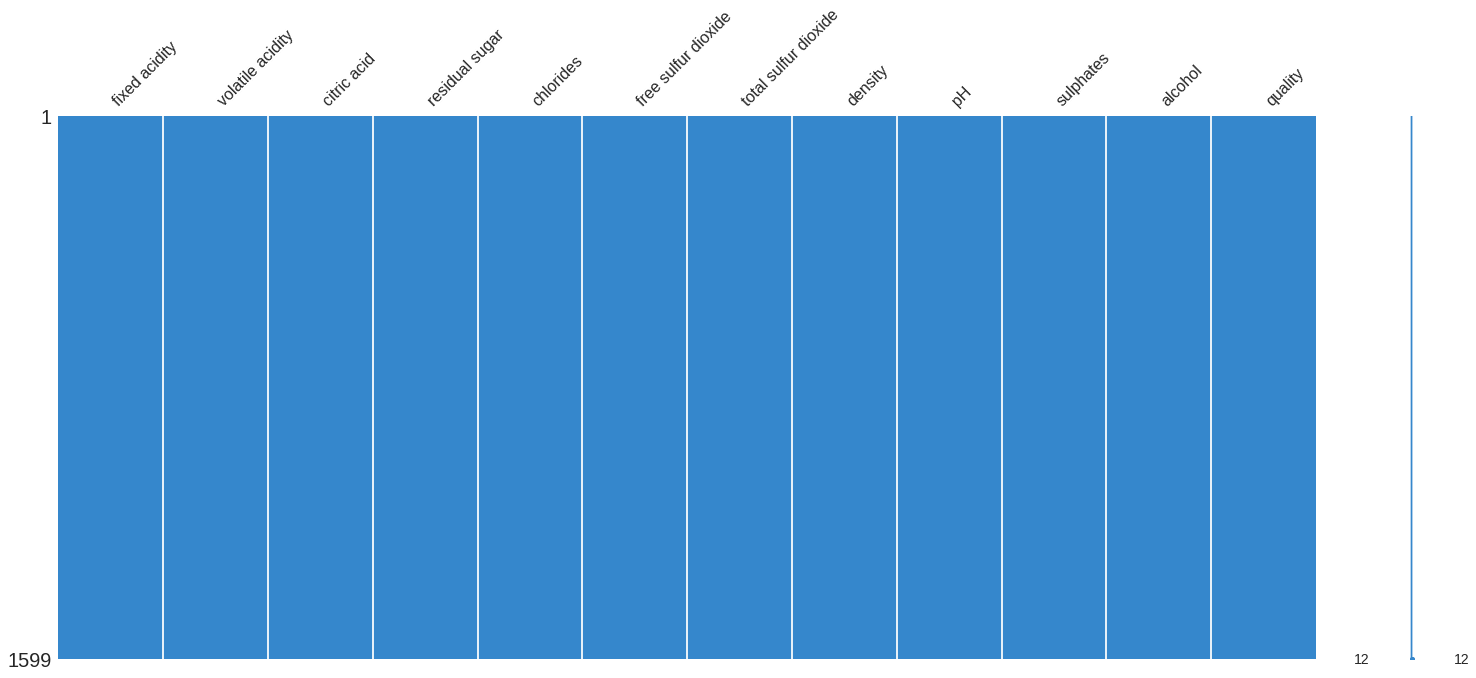

In [0]:
#checking for missing values
# Plot the missing map
def missing_map(data, color, title = "Missing map"):
    # Missing map from missingno
    plot = msno.matrix(data, color=(0.21,  0.53, 0.8), inline = False)
    # Adding the title
    plot.suptitle(t = title, fontsize = 40, weight = "bold", y = 1.15)
    # Make the plot
    plot.show()

# Calling the missing_map() over the Red and White wine data
missing_map(wine_red_df, (0.21,  0.53, 0.8), "Red Wine Missing map")
missing_map(wine_white_df, (0.21,  0.53, 0.8), "White Wine Missing map")

In [0]:
# Compute the percentage of missing value in the data
def missing_percentage(data1, data2, col_name = "Missing value (%)"):
    # Calculating the missing percentage
    missing_df1 = pd.DataFrame(data1.isnull().sum() /len(data1)*100, columns = [col_name])
    missing_df2 = pd.DataFrame(data2.isnull().sum() /len(data2)*100, columns = [col_name])
    # Forming the output dataframe
    missing_df = pd.DataFrame({'Red Wine': missing_df1.iloc[:, 0], 'White wine': missing_df2.iloc[:, 0]})
    return missing_df

missing_percentage(wine_red_df, wine_white_df)

,Red Wine,White wine
fixed acidity,0.0,0.0
volatile acidity,0.0,0.0
citric acid,0.0,0.0
residual sugar,0.0,0.0
chlorides,0.0,0.0
free sulfur dioxide,0.0,0.0
total sulfur dioxide,0.0,0.0
density,0.0,0.0
pH,0.0,0.0
sulphates,0.0,0.0


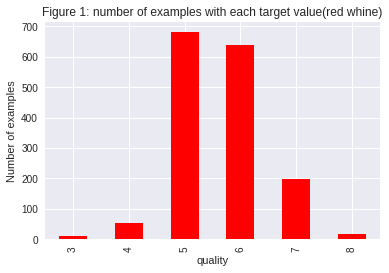

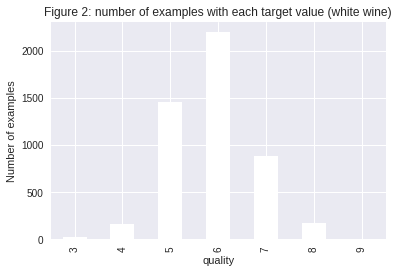

In [0]:
#some Exploratory Data Analysis
#bar graphs for distribution
red_counts=wine_red_df.groupby('quality').size()
plt.xlabel("Quality")
plt.ylabel("Number of examples")
plt.title('Figure 1: number of examples with each target value(red whine)')
red_counts.plot(kind='bar',color='r')
plt.show()

white_counts=wine_white_df.groupby('quality').size()
plt.xlabel("Quality")
plt.ylabel("Number of examples")
plt.title('Figure 2: number of examples with each target value (white wine)')
white_counts.plot(kind='bar',color='w')
plt.show()

We notice that for both datasets follow a gaussian distribution with a mean between 5 and 6, and with low variance since targets below 3 and above 8 are non existant. This will affect our analysis in the sense that it will be hard to predict a quality out of the ranges we have in our training set.

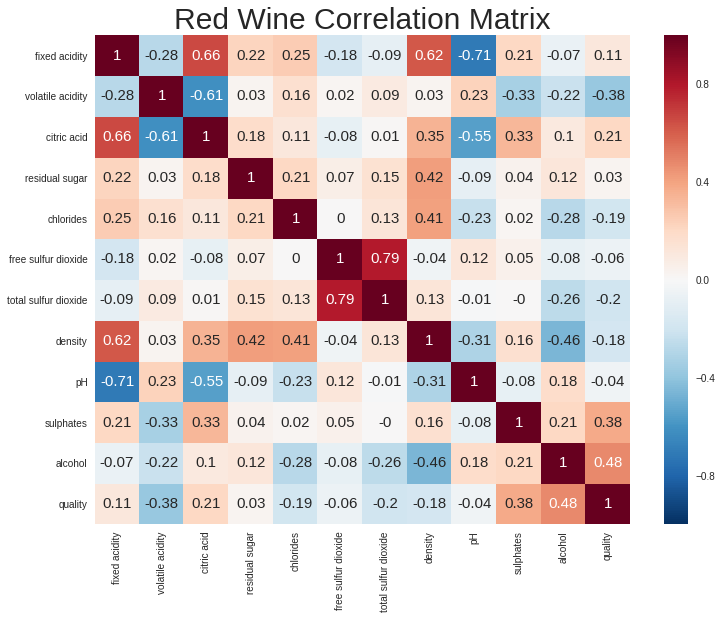

In [0]:
#let's look at correlation
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(wine_red_df, title = "Red Wine Correlation Matrix")

From the above heatmap on the red wine, we have the following inference

It looks like we have pH and fixed acidity has inverse relationships between them. The same in case of citric acid and volatile acidity too.
There is a strong positive relationship between total sulfur dioxide and free sulfur dioxide.

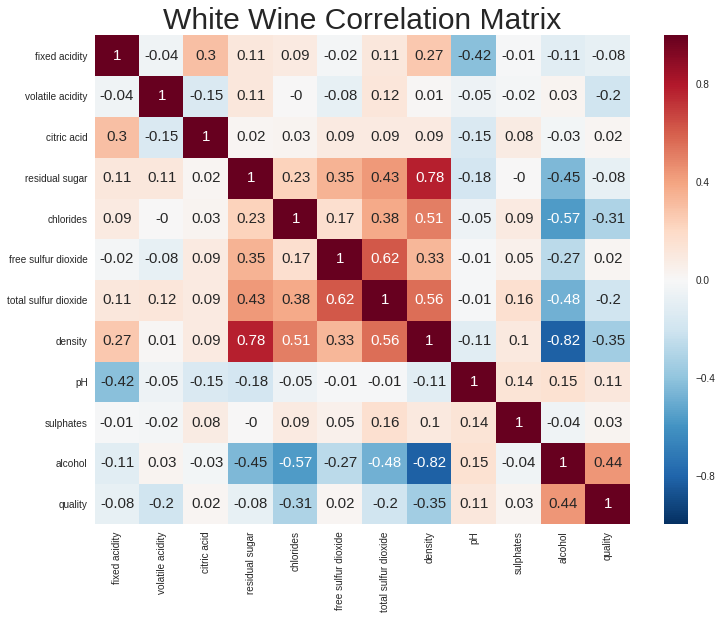

In [0]:
confusion_matrix_plot(wine_white_df, title = "White Wine Correlation Matrix")


From the above white wine heatmap, we have the following inferences

We see that low density contents are high on alcohol content
Sugar content in the wine might represents the wine density
Just like red wine, here also total and free sulfur dioxide are related together
Now that we have seen much about the predictors lets see the responding varaible quality and how it is related to the predictors. We see the quality is more depend on the folowwing from both red and white wines

Positive relation (Increase in this will increase the quality)
Alcohol
Sulphates
Positive relation (Increase in this will decrease the quality)
Density
Volatile acidity
Chlorides
This is interesting. We can suggest the manufactures this so that they will be benefit by increasing the wine quality. About the usage of features to use in the model, this heatmaps and correlation helps us decide that

Free sulfur dioxide is not much related to quality and removing it from the predictora helps us do the dimensionality reduction and also adds weightage to other predictora most precisely it will add to total sulfur dioxide content.
However we wont be removing this feature as of now because this dataset is not that huge enough. With the present days GPUs and CPUs computation this sized dataset is not going to that difficult enough. So we will be using all the feature for our model predictions.

Other than that we will use all other predictors in our model.

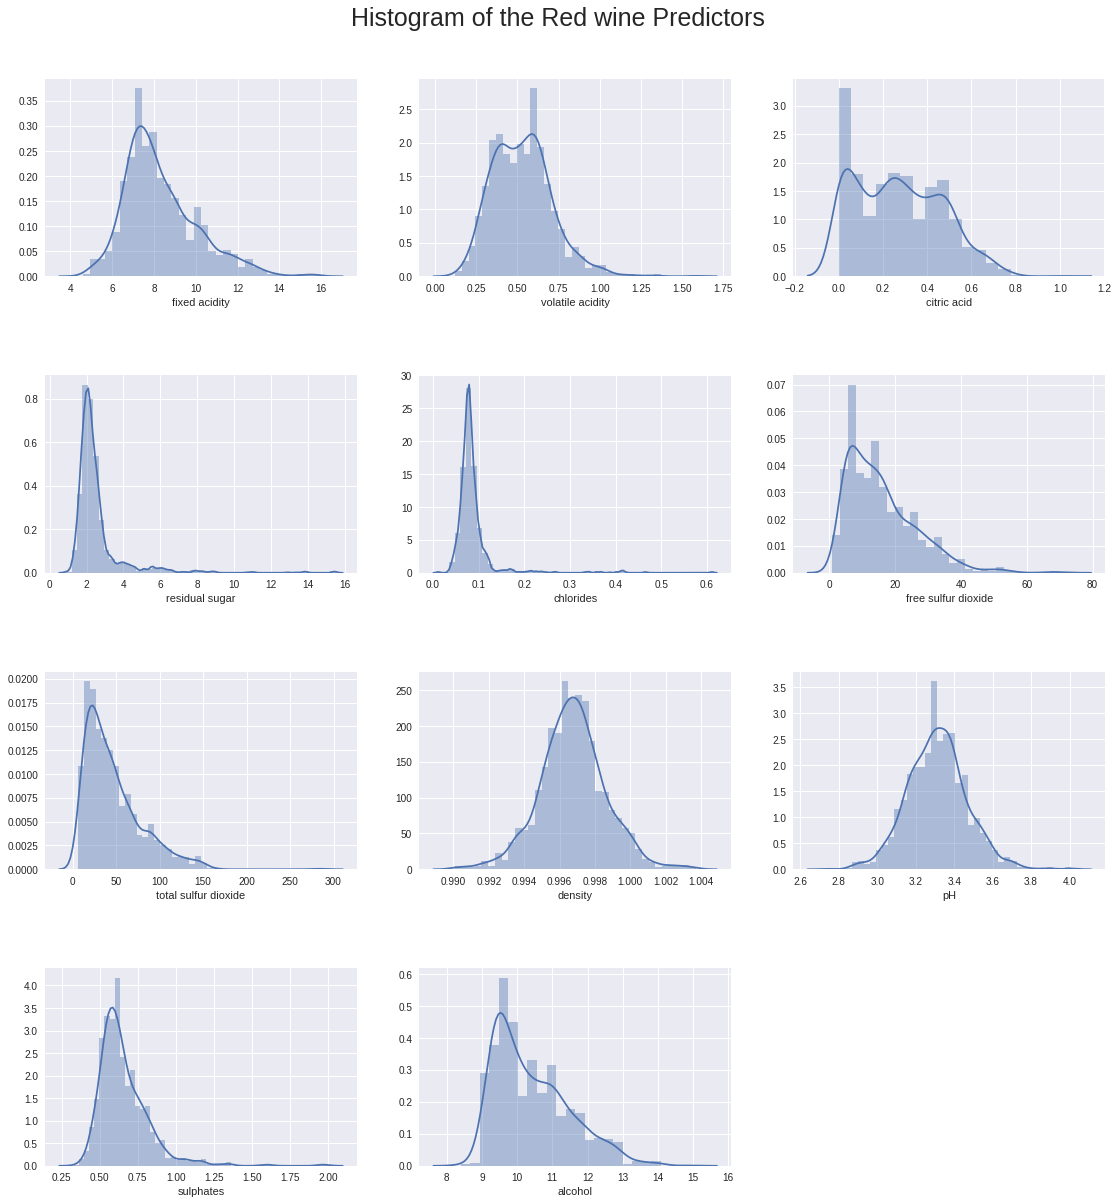

In [0]:
#skewness
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=25, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        sns.distplot(wine_red_df.iloc[:, i], ax=ax)
    # Show the plot
    plt.show()
    
subplot_hist(wine_red_df.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the Red wine Predictors")

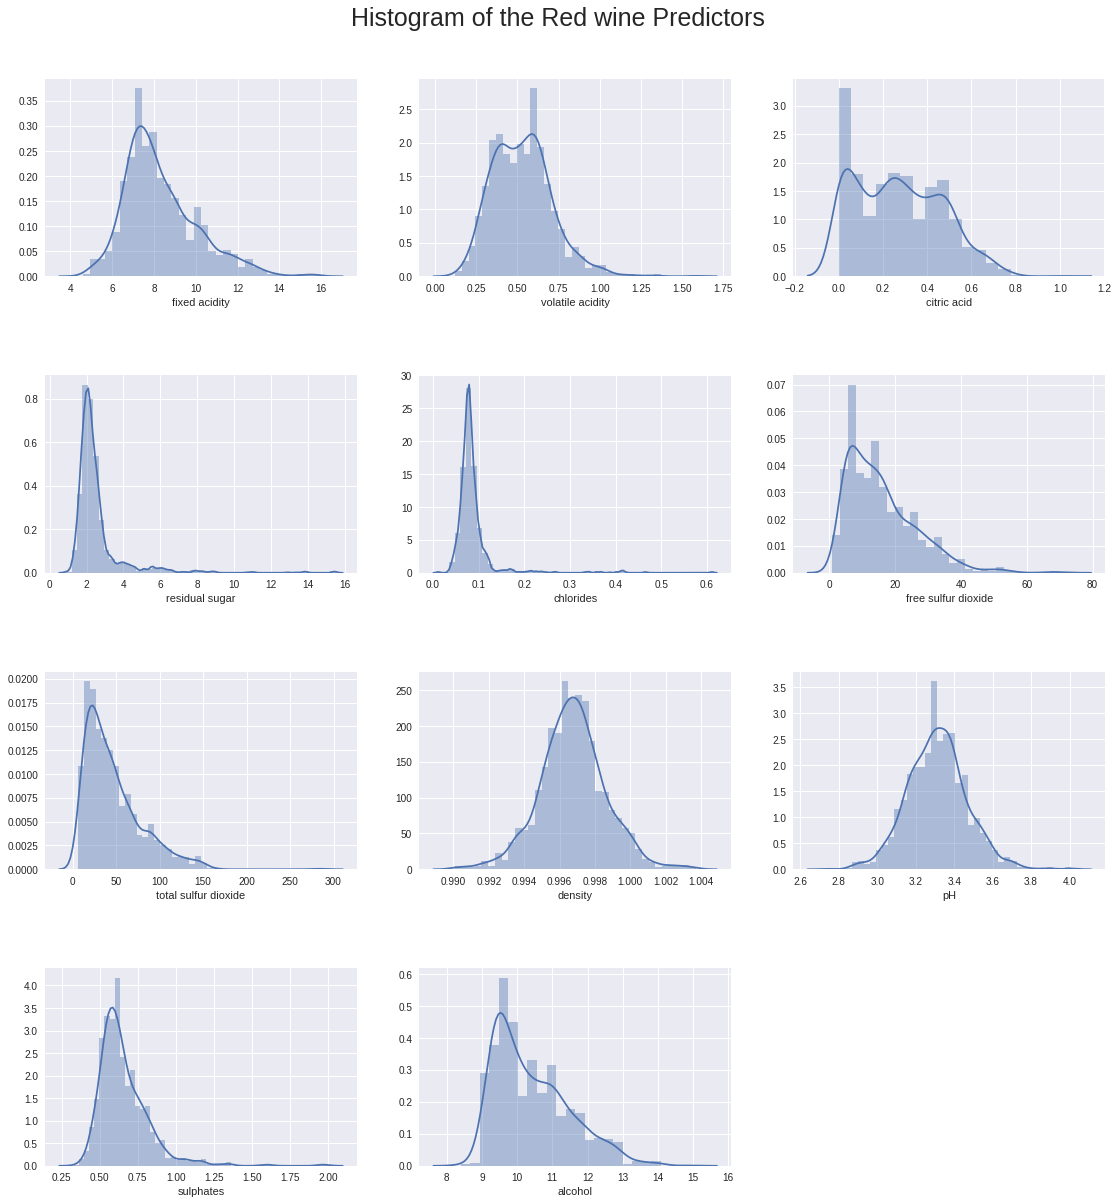

In [0]:
#same for red white
subplot_hist(wine_white_df.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the Red wine Predictors")

Now on seeing the distributions of the predictors of the both the dataset, we see some of the predictora are skewed. This is not good for modeling thus, we will do a boxcox transformation in order to remove the skewness in the dataset.

But when doing a boxcox transformation I found out that the citric acid predictors has some observation to be zero. To handle this we will just add 0.1 to the column so that we are not distorating the distribution and at the same time we can perform boxcox trainsfomation

In [0]:
wine_red_df[["citric acid"]] += 0.1
wine_white_df[["citric acid"]] += 0.1

In [0]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Red Wine
skewness_check(wine_red_df.iloc[:, :-1])

,Column,Skew Category,Skewness
0,fixed acidity,Heavily Skewed,0.981829
1,volatile acidity,Heavily Skewed,0.670962
2,citric acid,Light Skewed,0.318039
3,residual sugar,Heavily Skewed,4.536395
4,chlorides,Heavily Skewed,5.675017
5,free sulfur dioxide,Heavily Skewed,1.249394
6,total sulfur dioxide,Heavily Skewed,1.514109
7,density,Light Skewed,0.071221
8,pH,Light Skewed,0.193502
9,sulphates,Heavily Skewed,2.426393


In [29]:
# Skewness for White Wine
skewness_check(wine_white_df.iloc[:, :-1])

,Column,Skew Category,Skewness
0,fixed acidity,Heavily Skewed,0.647553
1,volatile acidity,Heavily Skewed,1.576497
2,citric acid,Heavily Skewed,1.281528
3,residual sugar,Heavily Skewed,1.076764
4,chlorides,Heavily Skewed,5.021792
5,free sulfur dioxide,Heavily Skewed,1.406314
6,total sulfur dioxide,Light Skewed,0.390590
7,density,Heavily Skewed,0.977474
8,pH,Light Skewed,0.457642
9,sulphates,Heavily Skewed,0.976894


In [30]:
# Boxcox Tranformation to remove skewness
def boxcox_trans(data):
    for i in range(data.shape[1]):
        data.iloc[:, i], _ = st.boxcox(data.iloc[:, i])
    return data

# Subset the predcitors
red_trans = wine_red_df.copy(deep = True)
red_trans.iloc[:, :-1] = boxcox_trans(red_trans.iloc[:, :-1])
skewness_check(red_trans.iloc[:, :-1])

,Column,Skew Category,Skewness
0,fixed acidity,Light Skewed,0.000517
1,volatile acidity,Light Skewed,0.000595
2,citric acid,Light Skewed,-0.112744
3,residual sugar,Light Skewed,-0.095840
4,chlorides,Light Skewed,-0.499174
5,free sulfur dioxide,Light Skewed,-0.019759
6,total sulfur dioxide,Light Skewed,-0.008021
7,density,Light Skewed,-0.004737
8,pH,Light Skewed,-0.000300
9,sulphates,Light Skewed,-0.024756


In [31]:
# Subset the predcitors
white_trans = wine_white_df.copy(deep = True)
white_trans.iloc[:, :-1] = boxcox_trans(white_trans.iloc[:, :-1])
skewness_check(white_trans.iloc[:, :-1])

,Column,Skew Category,Skewness
0,fixed acidity,Light Skewed,-0.005864
1,volatile acidity,Light Skewed,-0.005001
2,citric acid,Light Skewed,0.110011
3,residual sugar,Light Skewed,-0.051901
4,chlorides,Light Skewed,-0.159103
5,free sulfur dioxide,Light Skewed,0.030897
6,total sulfur dioxide,Light Skewed,0.022700
7,density,Light Skewed,0.018593
8,pH,Light Skewed,-0.003674
9,sulphates,Light Skewed,-0.001163


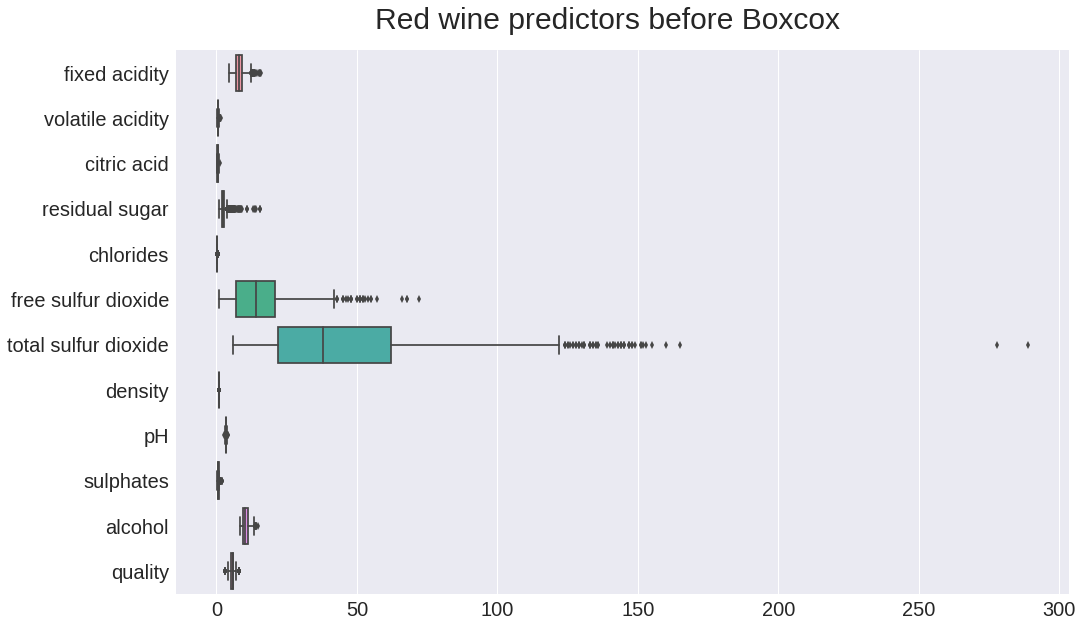

In [32]:
#checking for outliers
# Custom boxplot
def box_plot(data, height = 10, width = 16, title = "Boxplot"):
    # Make the figure object
    plt.figure(figsize=(width, height))
    # Add title
    plt.suptitle(title, y = 0.94, fontsize = 30)
    # Scale the font size
    sns.set(font_scale = 2)
    # Create the boxplot
    sns.boxplot(data = data, orient = "h")
    
box_plot(data = wine_red_df, title = "Red wine predictors before Boxcox")

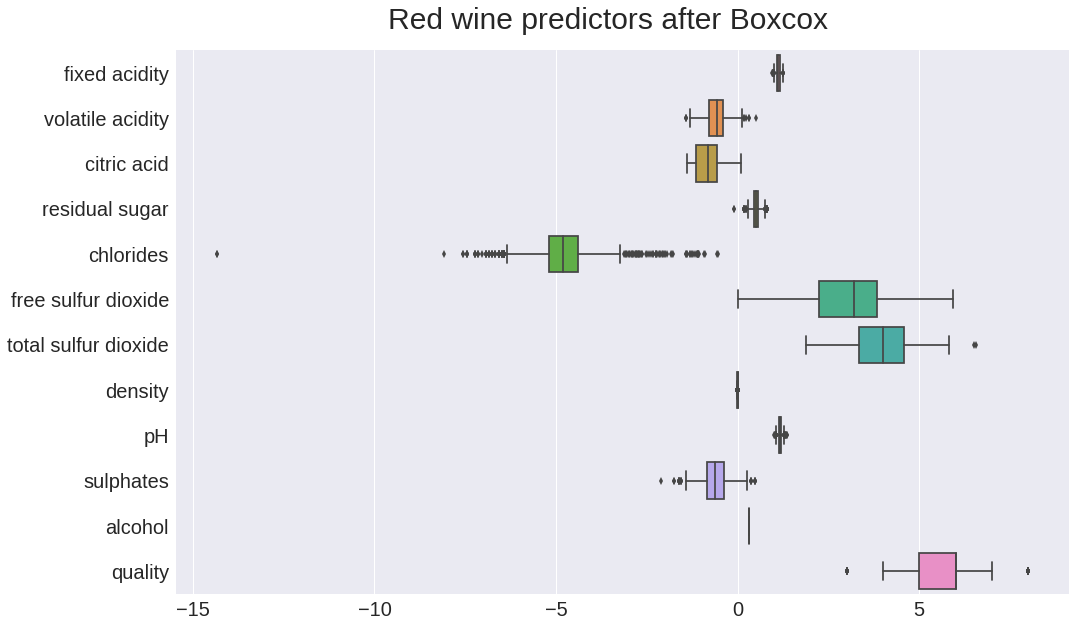

In [33]:
box_plot(data = red_trans, title = "Red wine predictors after Boxcox")

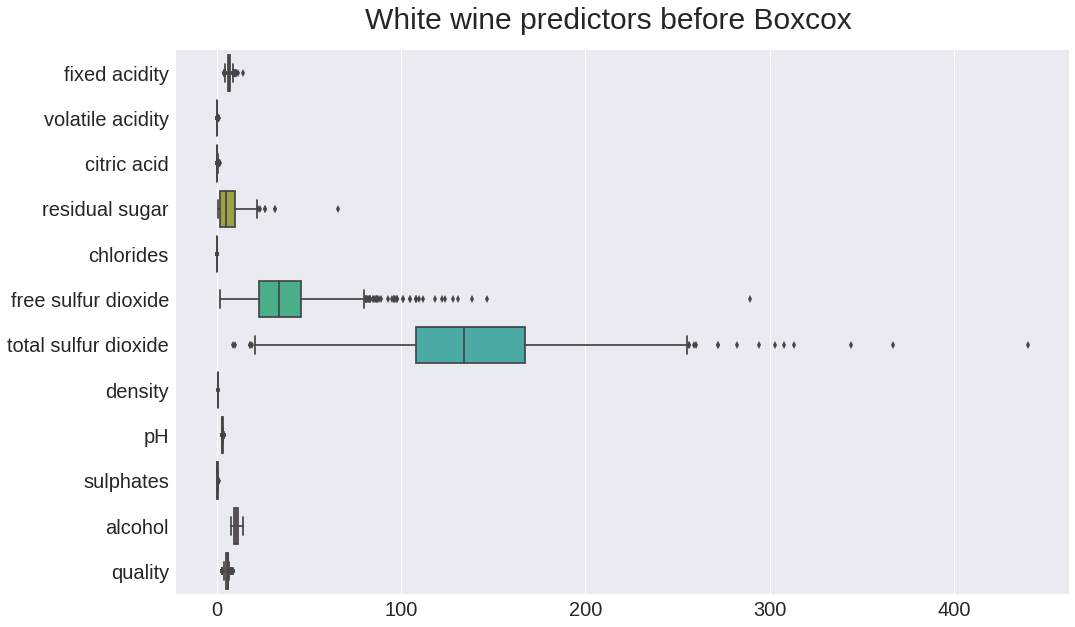

In [34]:
box_plot(data = wine_white_df, title = "White wine predictors before Boxcox")

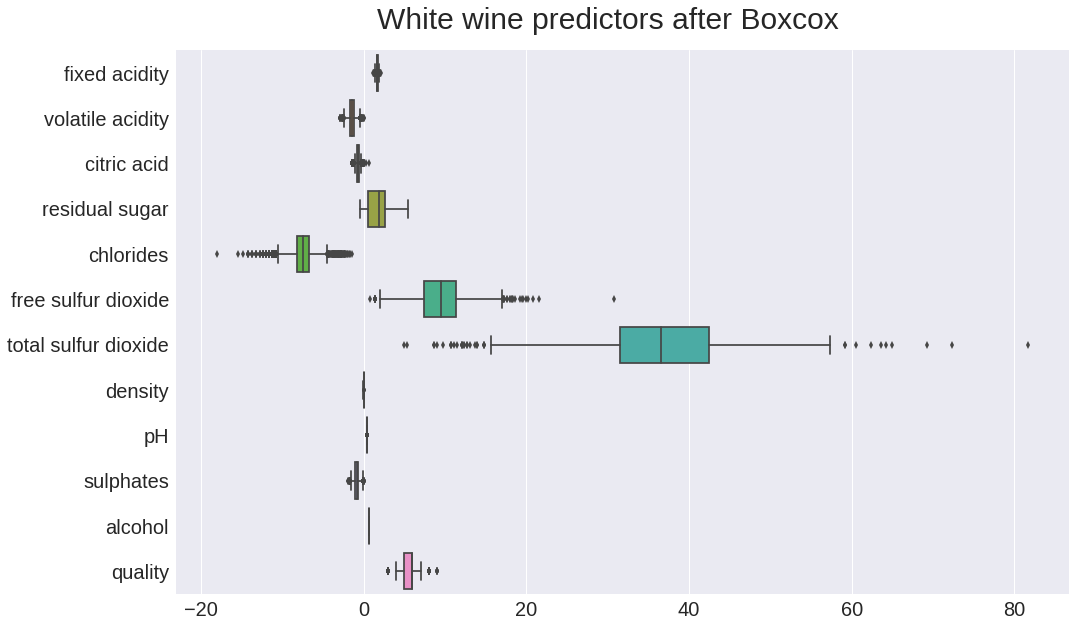

In [35]:
box_plot(data = white_trans, title = "White wine predictors after Boxcox")

**Machine Learning**

Now that we have did our analysis on the data and done with all the preprocessing, let try to bulid our model that could predict quality of the red and white wine. The quality is dicrete label attribute, so this is a supervised classification problem.

We will two approach for buliding model. One is using one of the traditional classifcation Machine Learning algorithm and another by using Neural Networks using Tensorflow. For the traditional model I am going to use Support vector Machines. Thus we have

1) Support Vector Machines

2) Neural Networks

Before creating the model we need to split the data into testing and training set. This will help us to make our more generalized to the data which we have not seen before. We will have 75% of the data in the train set and the rest in the test set. I have set the random seed to be 1 for reproduciablity

In [0]:
# Split the the whole data into test and train
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(wine_red_df.iloc[:, :-1], wine_red_df.iloc[:, -1],
                                                    test_size=0.25, random_state=1)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(wine_white_df.iloc[:, :-1], wine_white_df.iloc[:, -1],
                                                    test_size=0.25, random_state=1)

In [37]:
#Support Vector Machines (SVM)
# Custom functions to use the SvM model
def svm_accuracy_cv(X_train, X_test, y_train, y_test, n_fold = 10):
    # Intialize the variables
    best_score = 0
    best_C = 10000
    C_list = [1, 10, 100, 1000]
    for C in C_list:
        # Creating the SVM model 
        svc = svm.SVC(C = C, kernel = 'rbf')
        # Getting the scores on n folds
        scores = cross_val_score(svc, X_train, y_train, cv = n_fold)
        score = scores.mean()
        # Check and assign the best score paramters
        if score > best_score:
            best_C = C
            best_score = score
    # Fir the complete model over all the training data
    svc = svm.SVC(C = best_C, kernel = "rbf")
    svc.fit(X_train, y_train)
    # Get the accuracy over the teating data
    accuracy = svc.score(X_test, y_test)
    return accuracy, best_C

# Compute the accuracy
red_wine_accuracy, C_red = svm_accuracy_cv(X_train_red, X_test_red, y_train_red, y_test_red, n_fold = 10)
white_wine_accuracy, C_white = svm_accuracy_cv(X_train_white, X_test_white, y_train_white, y_test_white, n_fold = 10)

# Print the accuracy
print("The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is", 
      round(red_wine_accuracy * 100, 2), "percentage with the best cost value of", C_red)
print("The accuracy of the SVM model on White wine dataset with 10 fold cross validation is", 
      round(white_wine_accuracy * 100, 2), "percentage with the best cost value of", C_white)

The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is 57.75 percentage with the best cost value of 1000
The accuracy of the SVM model on White wine dataset with 10 fold cross validation is 57.55 percentage with the best cost value of 1000


Can we bulid a model that can make predicition on whether it is a red or white wine? Of course we can, let also bulid that model. For this we need to merge both the dataset into one single dataset by haveing new column that represent '0' for Red and '1' white wine. Then we will follow the same procedure as previously to use the custom SVM model we bulid before.

In [38]:
# Adding the new column wine type 
red_trans["wine type"] = 0
white_trans["wine type"] = 1

# Concatenate both the dataset
wine_df = pd.concat([red_trans, white_trans], axis = 0, ignore_index = False)

# Split the the whole data into test and train
X_train, X_test, y_train, y_test = train_test_split(wine_df.iloc[:, :-1], wine_df.iloc[:, -1],
                                                    test_size=0.25, random_state=1)

# Compute the accuracy
accuracy, C = svm_accuracy_cv(X_train, X_test, y_train, y_test, n_fold = 10)

# Print the accuracy
print("The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is", 
      round(accuracy * 100, 2), "percentage with the best cost value of", C_red)

The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is 100.0 percentage with the best cost value of 1000
